In [1]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sklearn.metrics as sk
from sklearn.cluster import KMeans
from math import sqrt
from sklearn import preprocessing
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df=pd.read_csv("C:/Users/hitech services/Downloads/sonar-data-set/sonar.all-data.csv")

In [3]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
df.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

Text(0.5, 1, 'heat map')

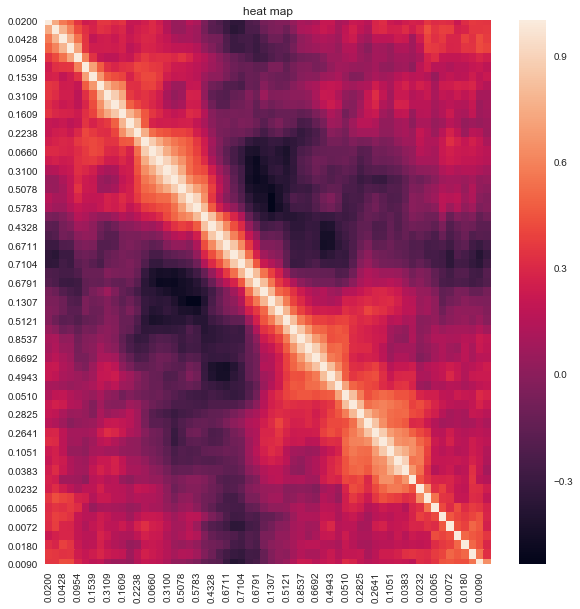

In [8]:
#correltaion matrix/heatmap
df.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr())
plt.title('heat map')

In [10]:
x_onehot=pd.get_dummies(df)

In [11]:
#standardising data
x_scale = StandardScaler().fit_transform(x_onehot)

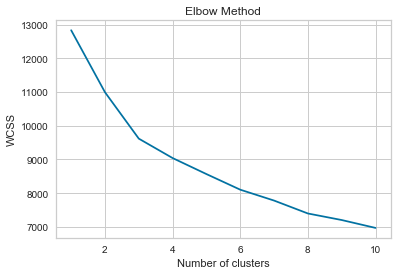

In [12]:
#elbow method to find n clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\hitech services\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\hitech services\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\hitech services\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


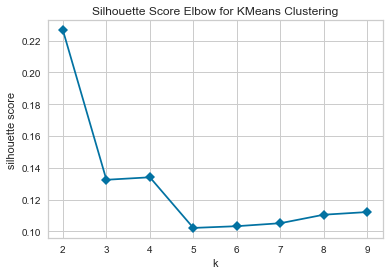

In [13]:
#check silhouette score
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(x_scale)    
visualizer.poof()   

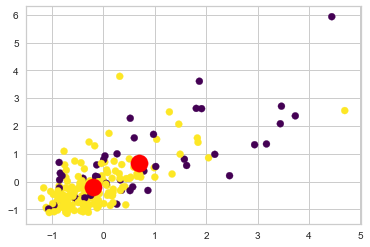

2.1255207401475453

In [14]:
#applying kmeans algorith
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x_scale)
plt.scatter(x_scale[:,0],x_scale[:,1],c=pred_y,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()
#calculating davies bouldin score
sklearn.metrics.davies_bouldin_score(x_scale,pred_y)

In [17]:
x=df.drop(['R'],axis=1)

In [21]:
#comparisons
x_kmeans=x.copy()
x_kmeans['R']=pred_y
x_kmeans.groupby('R').mean()
df.groupby('R').mean()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
0,0.045015,0.060817,0.064113,0.072165,0.085065,0.115737,0.139543,0.180457,0.241798,0.266489,...,0.024148,0.020315,0.014826,0.014089,0.013354,0.010757,0.011074,0.011885,0.011533,0.008707
1,0.024692,0.032050,0.038044,0.048878,0.072259,0.101417,0.116462,0.121597,0.158950,0.191604,...,0.013716,0.011517,0.009559,0.010011,0.008142,0.007445,0.006827,0.006822,0.006909,0.005899


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053


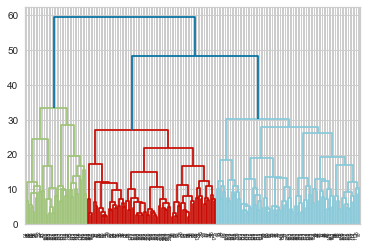

In [22]:
#hierarchical clustering-plotting dendrogram
dendrogram = sch.dendrogram(sch.linkage(x_scale, method='ward'))

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<Figure size 720x504 with 0 Axes>

2.0413466412316765

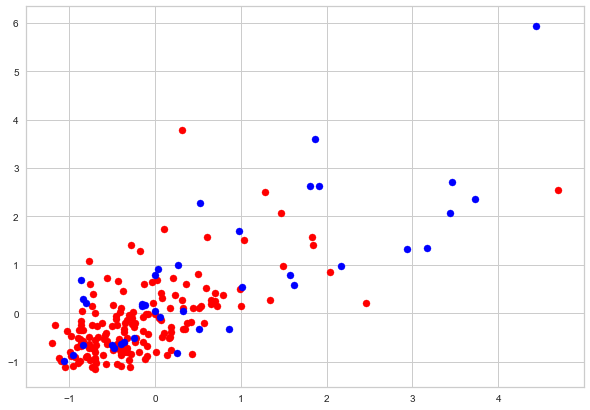

In [23]:
#applying agglomerative clustering algorithm
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit_predict(x_scale)
labels = model.labels_
#plotting clusters on scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(x_scale[labels==0, 0], x_scale[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(x_scale[labels==1, 0], x_scale[labels==1, 1], s=50, marker='o', color='blue')
sklearn.metrics.davies_bouldin_score(x_scale,labels)

In [24]:
x_hrcl=x.copy()
x_hrcl['R']=labels
x_hrcl.groupby('R').mean()
df.groupby('R').mean()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
0,0.025239,0.032803,0.039352,0.049524,0.072676,0.102905,0.119294,0.127654,0.166634,0.200827,...,0.014018,0.011779,0.009409,0.009923,0.008301,0.007406,0.007153,0.007004,0.006857,0.005753
1,0.046861,0.063526,0.063784,0.074195,0.085905,0.112132,0.131808,0.165911,0.225068,0.241237,...,0.025000,0.021003,0.016600,0.015337,0.013745,0.011626,0.010518,0.012139,0.012734,0.009950


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022524,0.030232,0.035879,0.041664,0.061680,0.096199,0.113767,0.117153,0.135584,0.158785,...,0.012198,0.010533,0.009673,0.009451,0.008581,0.007333,0.007708,0.006659,0.007058,0.006053
